# **Project: Providing data-driven suggestions for HR**

## Description and deliverables

This project is an opportunity to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.


# **PACE stages** (Using Google Analytical Framework)


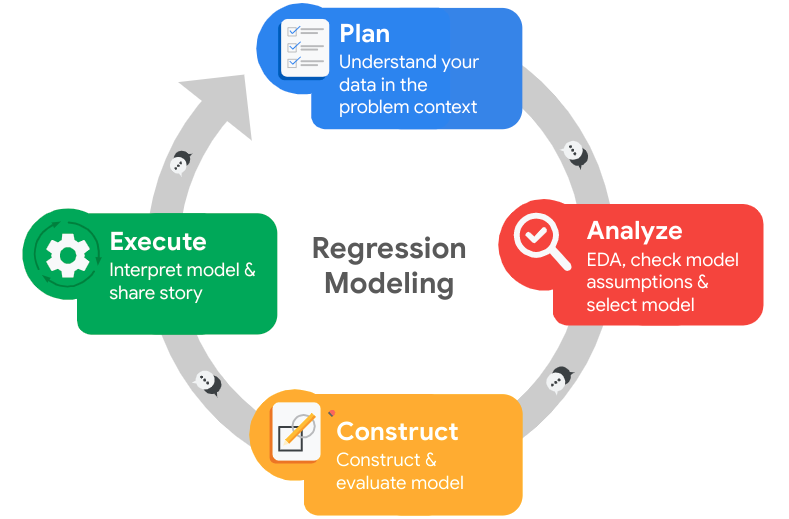

## **Pace: Plan**



### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They have the following question: what’s likely to make the employee leave the company?

The goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

By predicting employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset used in this project contains 15,000 rows and 10 columns for the variables listed below. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
# Import packages
 
# Standard operational package imports.
import numpy as np
import pandas as pd

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset


In [3]:
# Load dataset into a dataframe

df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
print(df0.info())
df0.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, standardizing the column names so that they are all in `snake_case`, correcting any column names that are misspelled, and making column names more concise as needed.

In [6]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
df1=df0.rename(columns = {'number_project':'number_projects',
      'time_spend_company':'time_spent_company', 'Work_accident':'work_accident', 'Department':'department'})

# Display all column names after the update
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_montly_hours', 'time_spent_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
df1.isna().sum()

satisfaction_level       0
last_evaluation          0
number_projects          0
average_montly_hours     0
time_spent_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
df1.duplicated().value_counts()

False    11991
True      3008
dtype: int64

In [10]:
# Inspect some rows containing duplicates as needed
df1

,satisfaction_level,last_evaluation,number_projects,average_montly_hours,time_spent_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df2 = df1.drop_duplicates()

# Display first few rows of new dataframe as needed
df2.head(10)

,satisfaction_level,last_evaluation,number_projects,average_montly_hours,time_spent_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

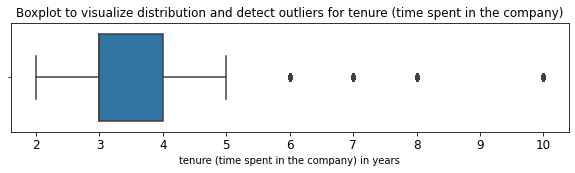

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(10,2))
plt.title('Boxplot to visualize distribution and detect outliers for tenure (time spent in the company)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df2['time_spent_company'])
plt.xlabel('tenure (time spent in the company) in years')
plt.show()


In [14]:
# Determine the number of rows containing outliers
q1 = df2['time_spent_company'].quantile(0.25)
q3 = df2['time_spent_company'].quantile(0.75)

iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr

(df2['time_spent_company'] > upper_limit).sum()


824

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
print(df2['left'].value_counts())
# Get percentages of people who left vs. stayed
print(df2['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Creating plots to visualize relationships between relevant variables in the data.

In [16]:
# Create a plot as needed
df2.head()

,satisfaction_level,last_evaluation,number_projects,average_montly_hours,time_spent_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


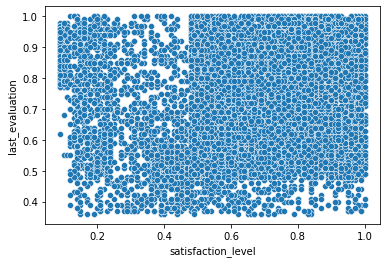

Correlation coefficient between Satisfaction Level and Last Evaluation Score
[[1.         0.09518595]
 [0.09518595 1.        ]]


In [17]:
# Create a plot as needed
sns.scatterplot(x=df2['satisfaction_level'], y=df2['last_evaluation'])
plt.show()
print("Correlation coefficient between Satisfaction Level and Last Evaluation Score")
print(np.corrcoef(df2['satisfaction_level'], df2['last_evaluation']))

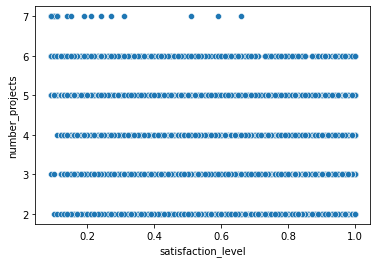

Correlation coefficient between Satisfaction Level and Nomber of Projects
[[ 1.         -0.13324628]
 [-0.13324628  1.        ]]


In [18]:
# Create a plot as needed
sns.scatterplot(x=df2['satisfaction_level'], y=df2['number_projects'])
plt.show()
print("Correlation coefficient between Satisfaction Level and Nomber of Projects")
print(np.corrcoef(df2['satisfaction_level'], df2['number_projects']))

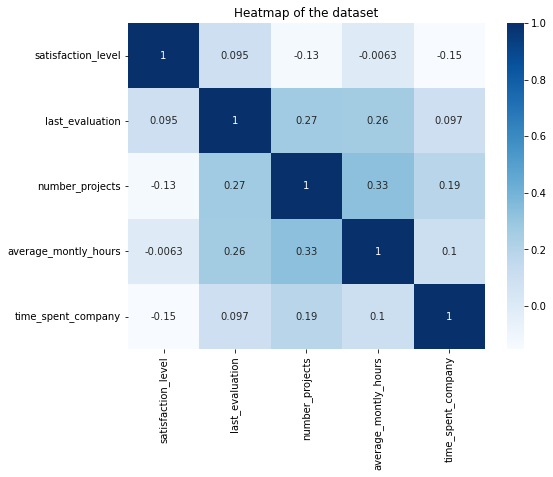

In [19]:
# Create a plot as needed
# Creating a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(
    df2[['satisfaction_level','last_evaluation', 'number_projects', 'average_montly_hours', 'time_spent_company']]
    .corr(), 
    annot=True, 
    cmap="Blues")
plt.title("Heatmap of the dataset")
plt.show()

### Insights

* There is no multicolinearity, all correlation coefficients are low.
* The data is relatively imbalance (16.67% of employees left).
* There outliers in the time spent in the company but they will be kept in the data set in some scenarios and remove in other scenarios to see the changes.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the types of models most appropriate for this task.

Logistic regression is appropriaty for this task. It helps predict binary target (employee left or not), while giving the opportunity to interpret the nature of the relationship between the outcome and independent variables.

### Modeling



In [20]:
#Checking the variables types
df2.dtypes

satisfaction_level       float64
last_evaluation          float64
number_projects            int64
average_montly_hours       int64
time_spent_company         int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

#### Transforming catogorical variables into dummie variables
department and salary are catogorical variables. They need to be transformed into dummy variables.

In [21]:
#Transforming categorical variables into dummies, while dropping the first categories to avoid mutlicolinearity issues.
df3=pd.get_dummies(df2, drop_first=True)

### Model 0: Logistic Regression - No upsampling


In [22]:
y0 = df3['left']
X0 = df3.drop('left', axis=1)
X0.head()

,satisfaction_level,last_evaluation,number_projects,average_montly_hours,time_spent_company,work_accident,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0


#### Train and Test samples

In [23]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0,y0, test_size=0.2, stratify=y0, random_state=42)

#### Training the Logistic Regression Model

In [24]:
lr0 = LogisticRegression(random_state=0, max_iter=10000)

In [25]:
%%time
lr0.fit(X0_train, y0_train)

CPU times: total: 281 ms
Wall time: 818 ms


LogisticRegression(max_iter=10000, random_state=0)

In [26]:
lr0.coef_[0]

array([-3.7790327 ,  0.72001154, -0.26893668,  0.00409842,  0.32036209,
       -1.34268535, -1.04811164, -0.46659949,  0.00809048,  0.04314294,
       -0.28999308, -0.03019049, -0.13636899,  0.03344517,  0.01733263,
        0.05322419,  1.87090387,  1.44263976])

In [27]:
X0_train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_montly_hours', 'time_spent_company', 'work_accident',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

#### Model coefficients

In [28]:
model_coef0 = pd.DataFrame(data={
    "Feature Name":X0_train.columns,
    "Model Coefficient":lr0.coef_[0]
})
model_coef0

,Feature Name,Model Coefficient
0,satisfaction_level,-3.779033
1,last_evaluation,0.720012
2,number_projects,-0.268937
3,average_montly_hours,0.004098
4,time_spent_company,0.320362
5,work_accident,-1.342685
6,promotion_last_5years,-1.048112
7,department_RandD,-0.466599
8,department_accounting,0.008090
9,department_hr,0.043143


#### Prediction on test data and Confusion Matrix

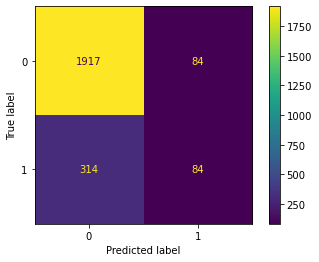

In [29]:
y0_pred = lr0.predict(X0_test)
cm0 = confusion_matrix(y0_test,y0_pred, labels = lr0.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm0, display_labels = lr0.classes_)
disp.plot(values_format = '')
plt.show()

#### ROC Curve

C:\Users\excel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


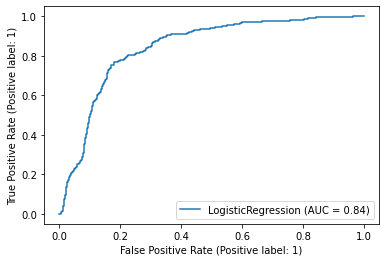

In [30]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr0, X0_test, y0_test) 
plt.show()

In [31]:
from sklearn.metrics import roc_auc_score
y0_pred_proba = lr0.predict_proba(X0_test)[:,1]
auc0 = roc_auc_score(y0_test, y0_pred_proba) 
auc0

0.8415666538590002

#### Results

In [32]:
results0 = pd.DataFrame(
{
    "Model":"Model 0 : LR Without Upsampling",
    "AUC":[round(auc0,3)],
    "Precision":[round(precision_score(y0_test,y0_pred),3)],
    "Recall":[round(recall_score(y0_test,y0_pred),3)],
    "Accuracy":[round(accuracy_score(y0_test,y0_pred),3)],
    "F1":[round(f1_score(y0_test,y0_pred),3)]
}
)

results0

,Model,AUC,Precision,Recall,Accuracy,F1
0,Model 0 : LR Without Upsampling,0.842,0.5,0.211,0.834,0.297


### Model 1: Logistic Regression - with upsampling
(Performing upsampling to rebalance the data, since the data is imbalanced)

In [33]:
df3['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

#### Upsampling

In [34]:
majority = df3[df3['left']==0]
minority = df3[df3['left']==1]

In [35]:
from sklearn.utils import resample
df_up = pd.concat([majority, resample(minority, replace=True, n_samples=len(majority), random_state=0)]).reset_index(drop=True)

In [36]:
df_up['left'].value_counts()

0    10000
1    10000
Name: left, dtype: int64

#### Outcome and Features

In [37]:
y1 = df_up['left']
X1 = df_up.drop('left', axis=1)
X1.head()


,satisfaction_level,last_evaluation,number_projects,average_montly_hours,time_spent_company,work_accident,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.58,0.74,4,215,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.82,0.67,2,202,3,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0.45,0.69,5,193,3,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0.78,0.82,5,247,3,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.49,0.60,3,214,2,0,0,0,0,0,0,0,0,1,0,0,1,0


#### Train and Test samples

In [38]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.2, stratify=y1, random_state=42)

#### Training the Logistic Regression Model

In [39]:
lr1 = LogisticRegression(random_state=0, max_iter=10000)


In [40]:
%%time
lr1.fit(X1_train, y1_train)

CPU times: total: 422 ms
Wall time: 699 ms


LogisticRegression(max_iter=10000, random_state=0)

#### Model coefficients


In [41]:
model_coef1 = pd.DataFrame(data={
    "Feature Name":X1_train.columns,
    "Model Coefficient":lr1.coef_[0]
})
model_coef1

,Feature Name,Model Coefficient
0,satisfaction_level,-4.500578
1,last_evaluation,1.253510
2,number_projects,-0.446193
3,average_montly_hours,0.004077
4,time_spent_company,0.657436
5,work_accident,-1.420296
6,promotion_last_5years,-1.268258
7,department_RandD,-0.335191
8,department_accounting,-0.009877
9,department_hr,0.045437


#### Prediction on test data and Confusion Matrix
(original test data, unbalanced one)

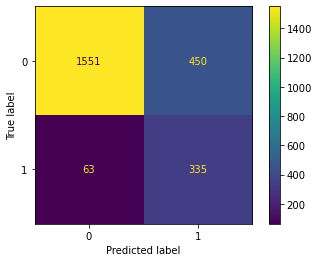

In [42]:
y1_pred = lr1.predict(X0_test)
cm1 = confusion_matrix(y0_test,y1_pred, labels = lr1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = lr1.classes_)
disp.plot(values_format = '')
plt.show()

#### ROC Curve
(on original test data)

C:\Users\excel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


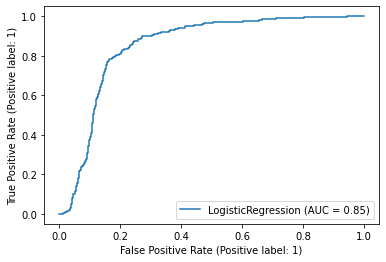

In [43]:
plot_roc_curve(lr1, X0_test, y0_test) 
plt.show()

In [44]:
from sklearn.metrics import roc_auc_score
y1_pred_proba = lr1.predict_proba(X0_test)[:,1]
auc1 = roc_auc_score(y0_test, y1_pred_proba) 
auc1


0.8490666726938038

In [45]:
results1 = pd.DataFrame(
{
    "Model":"Model 1 : LR With Upsampling",
    "AUC":[round(auc1,3)],
    "Precision":[round(precision_score(y0_test,y1_pred),3)],
    "Recall":[round(recall_score(y0_test,y1_pred),3)],
    "Accuracy":[round(accuracy_score(y0_test,y1_pred),3)],
    "F1":[round(f1_score(y0_test,y1_pred),3)]
}
)

results1

,Model,AUC,Precision,Recall,Accuracy,F1
0,Model 1 : LR With Upsampling,0.849,0.427,0.842,0.786,0.566


### Model 2: Logistic Regression without Outliers and without updsampling

#### Reminder about outliers

In [46]:
print('Number of outliers in time spent in the company is: ' + str((df3['time_spent_company'] > upper_limit).sum()))

Number of outliers in time spent in the company is: 824


#### Deleting outliers 
Saving the results in a new data frame df_no_outliers

In [47]:
df_no_outliers = df3[df3['time_spent_company'] <= upper_limit]

print(df_no_outliers.shape)
print(df3.shape)

(11167, 19)
(11991, 19)


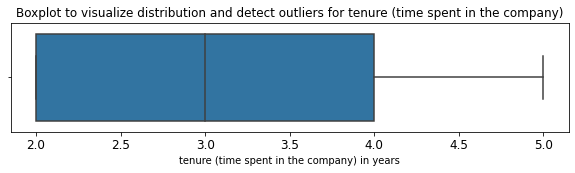

In [48]:
plt.figure(figsize=(10,2))
plt.title('Boxplot to visualize distribution and detect outliers for tenure (time spent in the company)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df_no_outliers['time_spent_company'])
plt.xlabel('tenure (time spent in the company) in years')
plt.show()


In [49]:
y2 = df_no_outliers['left']
X2 = df_no_outliers.drop('left', axis=1)
X2.head()

,satisfaction_level,last_evaluation,number_projects,average_montly_hours,time_spent_company,work_accident,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,1,0,0,1,0


#### Train and Test samples

In [50]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.2, stratify=y2, random_state=42)

#### Training the Logistic Regression Model

In [51]:
lr2 = LogisticRegression(random_state=0, max_iter=10000)

In [52]:
%%time
lr2.fit(X2_train, y2_train)

CPU times: total: 297 ms
Wall time: 554 ms


LogisticRegression(max_iter=10000, random_state=0)

#### Model coefficients


In [53]:
model_coef2 = pd.DataFrame(data={
    "Feature Name":X2_train.columns,
    "Model Coefficient":lr2.coef_[0]
})
model_coef2

,Feature Name,Model Coefficient
0,satisfaction_level,-4.383904
1,last_evaluation,-0.003345
2,number_projects,-0.487258
3,average_montly_hours,0.003564
4,time_spent_company,1.109814
5,work_accident,-1.529641
6,promotion_last_5years,-0.950045
7,department_RandD,-0.329483
8,department_accounting,-0.183593
9,department_hr,-0.037555


#### Prediction on test data and Confusion Matrix


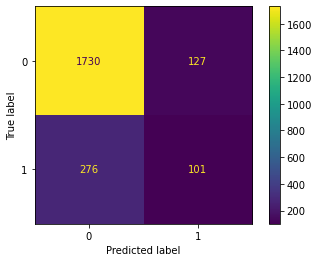

In [54]:
y2_pred = lr2.predict(X2_test)
cm2 = confusion_matrix(y2_test,y2_pred, labels = lr2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = lr2.classes_)
disp.plot(values_format = '')
plt.show()

#### ROC Curve

C:\Users\excel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


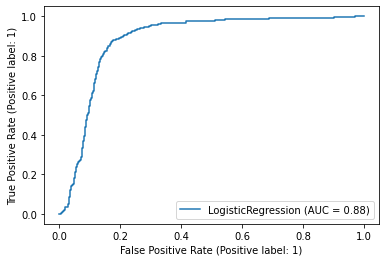

0.8809322814670706

In [55]:
plot_roc_curve(lr2, X2_test, y2_test) 
plt.show()

y2_pred_proba = lr2.predict_proba(X2_test)[:,1]
auc2 = roc_auc_score(y2_test, y2_pred_proba) 
auc2

#### Results


In [56]:
results2 = pd.DataFrame(
{
    "Model":"Model 2: LR Without Outliers and Without Upsampling",
    "AUC":[round(auc2,3)],
    "Precision":[round(precision_score(y2_test,y2_pred),3)],
    "Recall":[round(recall_score(y2_test,y2_pred),3)],
    "Accuracy":[round(accuracy_score(y2_test,y2_pred),3)],
    "F1":[round(f1_score(y2_test,y2_pred),3)]
}
)

results2

,Model,AUC,Precision,Recall,Accuracy,F1
0,Model 2: LR Without Outliers and Without Upsam...,0.881,0.443,0.268,0.82,0.334


### Model 3: Logistic Regression - without outliers and with upsampling
(since the data is imbalanced)

#### Upsampling

In [57]:
df_no_outliers['left'].value_counts()

0    9285
1    1882
Name: left, dtype: int64

In [58]:
majority = df_no_outliers[df_no_outliers['left']==0]
minority = df_no_outliers[df_no_outliers['left']==1]


In [59]:
df_up1 = pd.concat([majority, resample(minority, replace=True, n_samples=len(majority), random_state=0)]).reset_index(drop=True)

In [60]:
df_up1['left'].value_counts()

0    9285
1    9285
Name: left, dtype: int64

In [61]:
y3 = df_up1['left']
X3 = df_up1.drop('left', axis=1)
X3.head()

,satisfaction_level,last_evaluation,number_projects,average_montly_hours,time_spent_company,work_accident,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.58,0.74,4,215,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.82,0.67,2,202,3,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0.45,0.69,5,193,3,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0.78,0.82,5,247,3,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.49,0.60,3,214,2,0,0,0,0,0,0,0,0,1,0,0,1,0


#### Split data

In [62]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3, test_size=0.2, stratify=y3, random_state=42)


#### Training the Logistic Regression Model


In [63]:
lr3 = LogisticRegression(random_state=0, max_iter=10000)

In [64]:
%%time
lr3.fit(X3_train, y3_train)

CPU times: total: 656 ms
Wall time: 1.11 s


LogisticRegression(max_iter=10000, random_state=0)

#### Model coefficients


In [65]:
model_coef3 = pd.DataFrame(data={
    "Feature Name":X3_train.columns,
    "Model Coefficient":lr3.coef_[0]
})
model_coef3

,Feature Name,Model Coefficient
0,satisfaction_level,-5.692215
1,last_evaluation,0.030304
2,number_projects,-0.685868
3,average_montly_hours,0.002730
4,time_spent_company,1.757294
5,work_accident,-1.416920
6,promotion_last_5years,-0.537546
7,department_RandD,-0.297219
8,department_accounting,-0.051888
9,department_hr,-0.071085


#### Prediction on test data and Confusion Matrix


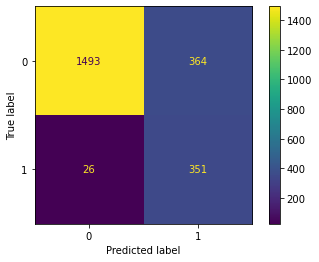

In [66]:
y3_pred = lr3.predict(X2_test)
cm3 = confusion_matrix(y2_test,y3_pred, labels = lr3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm3, display_labels = lr3.classes_)
disp.plot(values_format = '')
plt.show()

#### ROC Curve


C:\Users\excel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


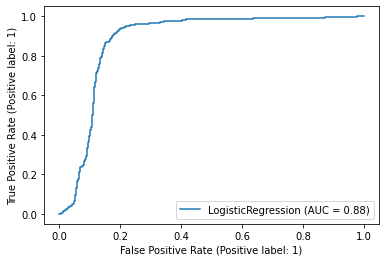

0.8788596878396892

In [67]:
plot_roc_curve(lr3, X2_test, y2_test) 
plt.show()

from sklearn.metrics import roc_auc_score
y3_pred_proba = lr3.predict_proba(X2_test)[:,1]
auc3 = roc_auc_score(y2_test, y3_pred_proba) 
auc3


#### Results


In [68]:
results3 = pd.DataFrame(
{
    "Model":"Model 3 : LR Without outliers and with Upsampling",
    "AUC":[round(auc3,3)],
    "Precision":[round(precision_score(y2_test,y3_pred),3)],
    "Recall":[round(recall_score(y2_test,y3_pred),3)],
    "Accuracy":[round(accuracy_score(y2_test,y3_pred),3)],
    "F1":[round(f1_score(y2_test,y3_pred),3)]
}
)

results3

,Model,AUC,Precision,Recall,Accuracy,F1
0,Model 3 : LR Without outliers and with Upsampling,0.879,0.491,0.931,0.825,0.643


### Comparing from from different models

#### Comparing coefficients

In [69]:
#coefficients = pd.concat([model_coef0, model_coef1, model_coef2, model_coef3], axis=1, keys='Feature Name')
#coefficients

coefficients = pd.merge(model_coef0, model_coef1, on='Feature Name')
coefficients = coefficients.rename(columns = {'Model Coefficient_x':'Coefficient (Model 0)',
      'Model Coefficient_y':'Coefficient (Model 1)'})
coefficients = pd.merge(coefficients, model_coef2, on='Feature Name')                               
coefficients = coefficients.rename(columns = {'Model Coefficient':'Coefficient (Model 2)'})
coefficients = pd.merge(coefficients, model_coef3, on='Feature Name')                               
coefficients = coefficients.rename(columns = {'Model Coefficient':'Coefficient (Model 3)'})
coefficients


,Feature Name,Coefficient (Model 0),Coefficient (Model 1),Coefficient (Model 2),Coefficient (Model 3)
0,satisfaction_level,-3.779033,-4.500578,-4.383904,-5.692215
1,last_evaluation,0.720012,1.253510,-0.003345,0.030304
2,number_projects,-0.268937,-0.446193,-0.487258,-0.685868
3,average_montly_hours,0.004098,0.004077,0.003564,0.002730
4,time_spent_company,0.320362,0.657436,1.109814,1.757294
5,work_accident,-1.342685,-1.420296,-1.529641,-1.416920
6,promotion_last_5years,-1.048112,-1.268258,-0.950045,-0.537546
7,department_RandD,-0.466599,-0.335191,-0.329483,-0.297219
8,department_accounting,0.008090,-0.009877,-0.183593,-0.051888
9,department_hr,0.043143,0.045437,-0.037555,-0.071085


In [70]:
df0['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

#### Comparing evaluation metrics

In [71]:
results = pd.concat([results0,results1, results2, results3]).reset_index(drop=True)
results

,Model,AUC,Precision,Recall,Accuracy,F1
0,Model 0 : LR Without Upsampling,0.842,0.500,0.211,0.834,0.297
1,Model 1 : LR With Upsampling,0.849,0.427,0.842,0.786,0.566
2,Model 2: LR Without Outliers and Without Upsam...,0.881,0.443,0.268,0.820,0.334
3,Model 3 : LR Without outliers and with Upsampling,0.879,0.491,0.931,0.825,0.643


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results


Logistic regression offers a good way to tackle the problem. There appears to be a good statistical relationship between several variables and the outcome of interest (whether an employe is likely to leave or not).
Out of four logistic regression modeling attempts, the one with upsampling and outliers deletion yield de best results overall, with an F1 score of 0.640. While this model's precision is low (0.488), its recall is particularly high (0.928), which means that  models is very accurate when it comes to predicting those who will actually leave the company, but more than half of those predicted to leave, will not leave in the end.

From the coefficients of the model, it appears that some variables are negatively associated with the log-odd of leaving the company, while other variables are positively associated with the log-odd of leaving the company. And the directions of those relationships make sens intuitively. For instance, the more the satisfaction level, the less likely an employee is to leave the country, and an employee with a low salary is more likely to leave the company than an employee of high salary.

### Conclusion, Recommendations, Next Steps

Working to improve employee satisfaction could help retain employees. It is also recommended to avoid not promoting employees for a too long period. 
The company should investigate to see why employees in Sales departement and Support department seem more likely to leave than others.
It is also worth refining the data and studying resignations and dismissals separately.
